# emotiondetection

In [1]:
import matplotlib.pyplot as plt
from glob import glob 
import cv2
import random
import os
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D 
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
print(tf.__version__)

2.13.0


# explore dataset

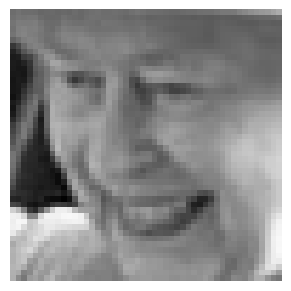

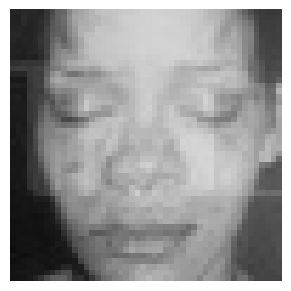

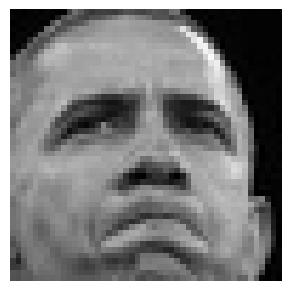

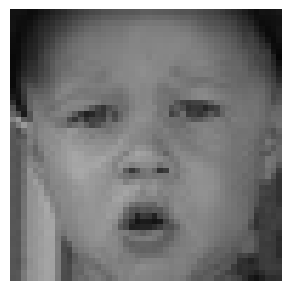

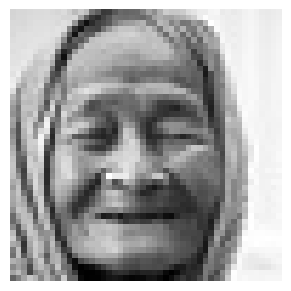

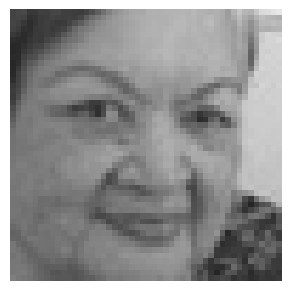

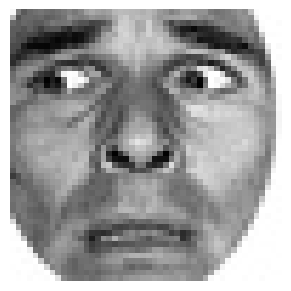

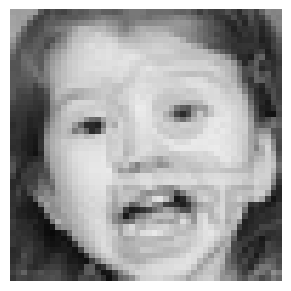

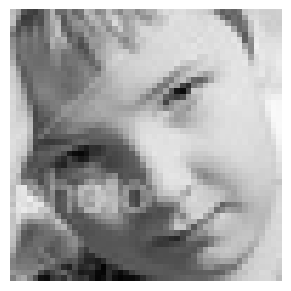

In [2]:
#images = glob("train/**/**")
images = glob("C:/Users/nk543/Desktop/nullclassemotonaldetector/kagale 2013/train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis("off")

### preparing data for traning

In [3]:
image_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("C:/Users/nk543/Desktop/nullclassemotonaldetector/kagale 2013/train",
                                                   target_size = (image_size,image_size),
                                                    color_mode = "grayscale", 
                                                    batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)



datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("C:/Users/nk543/Desktop/nullclassemotonaldetector/kagale 2013/test",
                                                   target_size = (image_size,image_size),
                                                    color_mode = "grayscale", 
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Defining Model

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    return x
    


In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)
    return x


In [7]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3,3))
    conv_2 = Convolution(inputs, 64, (5,5))
    conv_3 = Convolution(inputs, 128, (3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten, 256)
    output  = Dense(7, activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs=[output])
    model.compile(loss = ["categorical_crossentropy"], optimizer = "adam", metrics= ["accuracy"])
    return model   

In [8]:
model = model_fer((48,48,1))
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

#### Initializing Traning

In [9]:
#hyper parameter
epochs = 15 #we take less number epochs becoz training in my local pc takes time but when we train online we take large value
steps_per_epoch = train_generator.n//train_generator.batch_size #total number of image in traingenerator by batch size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor="val_accuracy", save_weights_only = True, mode= "max", verbose = 1)
callbacks = [checkpoint]


## training the model


In [ ]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks

)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6418 - accuracy: 0.3742
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 456s 1s/step - loss: 1.6418 - accuracy: 0.3742 - val_loss: 1.5549 - val_accuracy: 0.3938
Epoch 2/15
 54/448 [==>...........................] - ETA: 6:10 - loss: 1.3264 - accuracy: 0.5061

### model evealuation

In [40]:
model.evaluate(validation_generator)

113/113 [==============================] - 17s 148ms/step - loss: 2.0110 - accuracy: 0.4781


[2.0109517574310303, 0.4781275987625122]

### plotting loss

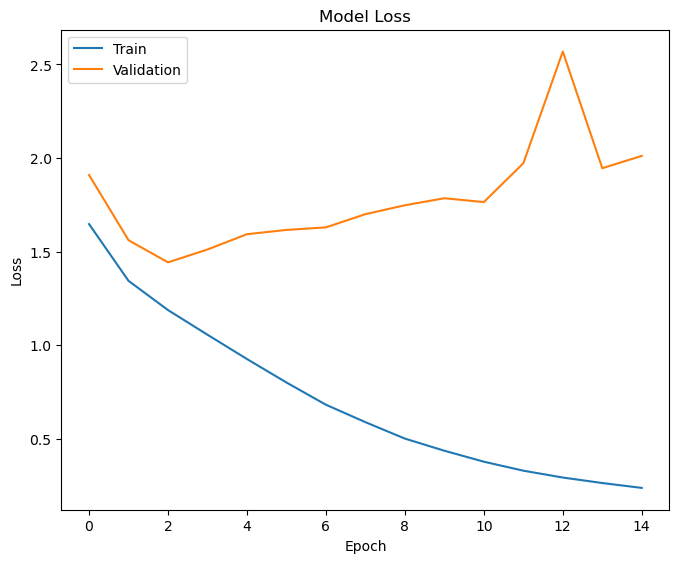

In [41]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.subplots_adjust(top = 1.0, bottom = 0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)


#### accuracy Matrix plotting

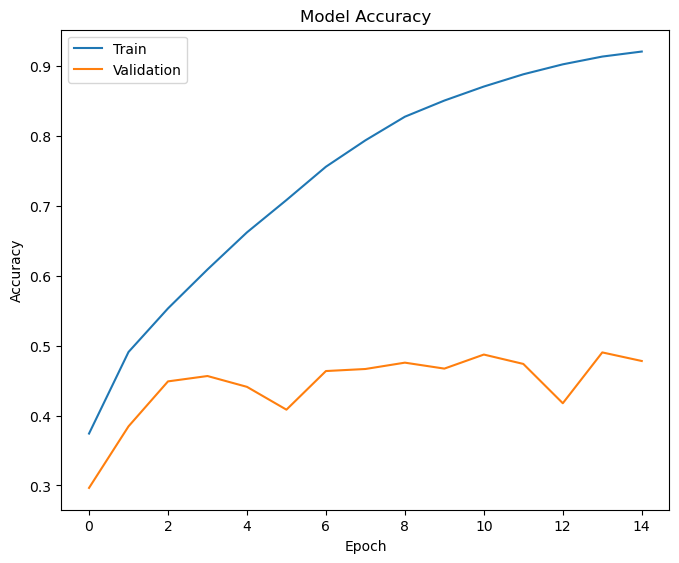

In [43]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.subplots_adjust(top = 1.0, bottom = 0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)


#### saving model

In [33]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
   json_file.write(model_json)